In [22]:
# Observations:
#     -Seasonal polarity can be observed on Lat vs Temp as the southern latitudes 
#     (currently in summer) show higher temperatures on average than northern latitudes,
#     with those points in the middle showing the highest and most uniform temperatures.

#     -Latitudes closer to the northern pole have a higher variance in temperature
    
#     -There does not appear to any obvious correlation between latitude and
#     either wind speed, cloudiness, or humidity.


import seaborn
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import requests as req
import json
from citipy import citipy
import random
import datetime

now = datetime.datetime.now()

In [23]:
def getCities(x,y):
    randlong = round((random.randint(-180,179) + random.random()),2) 
    randlat = round((random.randint(-90,89) + random.random()), 2)
    city = citipy.nearest_city(randlat, randlong)
    if (city.city_name, city.country_code) not in x and (city.city_name, city.country_code) not in y:
        x.append((city.city_name, city.country_code))
    else:
        getCities(x,y)
    return(x)

weather_data = []
cityList = []

print('Beginning Data Retrieval')
print('-------------------------')

for i in range(10):
    url = "http://api.openweathermap.org/data/2.5/weather"
    params = {'appid': "25df918b1b747a46beb7e27fc1f85b9d",
              'q': '',
              'units': 'imperial'}    
    cityCount = 0 
    citySet = []
    counter = 0
    while cityCount < 50:
        getCities(citySet,cityList)
        cityCount = cityCount + 1
    

    for city, code in citySet:
        params["q"] = f'{city},{code}'
        linkcity = city.replace(" ", "_")
        response = req.get(url, params=params)
        response_json = response.json()
        if response.status_code == 404:
            counter = counter
            getCities(citySet, cityList)   
        else:
            for data in response_json:
                relevantInfo = {"City":response_json["name"], 
                                "Cloudiness":response_json["clouds"]["all"], 
                                "Country":response_json["sys"]["country"],
                                "Humidity":response_json["main"]["humidity"], 
                                "Lat":response_json["coord"]["lat"], 
                                "Lng":response_json["coord"]["lon"],
                                "Max Temp (F)":response_json["main"]["temp_max"], 
                                "Wind Speed":response_json["wind"]["speed"]}
            weather_data.append(relevantInfo)
            counter = counter + 1
            print(f'Processing Record {counter} of Set {i+1} | {city}') 
            print(f'http://api.openweathermap.org/data/2.5/weather?q={linkcity},{code}&units=imperial')
            
    cityList = cityList + citySet
    
    
            
city_data_df = pd.DataFrame(weather_data)
city_data_df.to_csv("City_Data.csv")



Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | tashtagol
http://api.openweathermap.org/data/2.5/weather?q=tashtagol,ru&units=imperial
Processing Record 2 of Set 1 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial
Processing Record 3 of Set 1 | challans
http://api.openweathermap.org/data/2.5/weather?q=challans,fr&units=imperial
Processing Record 4 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial
Processing Record 5 of Set 1 | sao joao do paraiso
http://api.openweathermap.org/data/2.5/weather?q=sao_joao_do_paraiso,br&units=imperial
Processing Record 6 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial
Processing Record 7 of Set 1 | bilma
http://api.openweathermap.org/data/2.5/weather?q=bilma,ne&units=imperial
Processing Record 8 of Set 1 | san patricio
http://api.openweathermap.org/data/2.5/weather?q=san_patricio,mx&units=im

Processing Record 20 of Set 2 | mount isa
http://api.openweathermap.org/data/2.5/weather?q=mount_isa,au&units=imperial
Processing Record 21 of Set 2 | chakwal
http://api.openweathermap.org/data/2.5/weather?q=chakwal,pk&units=imperial
Processing Record 22 of Set 2 | grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand_gaube,mu&units=imperial
Processing Record 23 of Set 2 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=havre-saint-pierre,ca&units=imperial
Processing Record 24 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial
Processing Record 25 of Set 2 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero_negro,mx&units=imperial
Processing Record 26 of Set 2 | penaranda
http://api.openweathermap.org/data/2.5/weather?q=penaranda,ph&units=imperial
Processing Record 27 of Set 2 | nikolsk
http://api.openweathermap.org/data/2.5/weather?q=nikolsk,ru&units=imperial
Processing Record 28 of 

Processing Record 40 of Set 3 | lompoc
http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&units=imperial
Processing Record 41 of Set 3 | malanje
http://api.openweathermap.org/data/2.5/weather?q=malanje,ao&units=imperial
Processing Record 42 of Set 3 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial
Processing Record 43 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial
Processing Record 44 of Set 3 | saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial
Processing Record 45 of Set 3 | cacequi
http://api.openweathermap.org/data/2.5/weather?q=cacequi,br&units=imperial
Processing Record 46 of Set 3 | tome
http://api.openweathermap.org/data/2.5/weather?q=tome,cl&units=imperial
Processing Record 47 of Set 3 | svetlyy
http://api.openweathermap.org/data/2.5/weather?q=svetlyy,ru&units=imperial
Processing Record 48 of Set 3 | santa maria
http://api.openweathermap.org/data/2.5/weather?q=s

Processing Record 10 of Set 5 | georgetown
http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial
Processing Record 11 of Set 5 | virginia beach
http://api.openweathermap.org/data/2.5/weather?q=virginia_beach,us&units=imperial
Processing Record 12 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=imperial
Processing Record 13 of Set 5 | north bend
http://api.openweathermap.org/data/2.5/weather?q=north_bend,us&units=imperial
Processing Record 14 of Set 5 | karasjok
http://api.openweathermap.org/data/2.5/weather?q=karasjok,no&units=imperial
Processing Record 15 of Set 5 | inuvik
http://api.openweathermap.org/data/2.5/weather?q=inuvik,ca&units=imperial
Processing Record 16 of Set 5 | valparaiso
http://api.openweathermap.org/data/2.5/weather?q=valparaiso,cl&units=imperial
Processing Record 17 of Set 5 | awbari
http://api.openweathermap.org/data/2.5/weather?q=awbari,ly&units=imperial
Processing Record 18 of Set 5 | san juan
http://ap

Processing Record 31 of Set 6 | barcelona
http://api.openweathermap.org/data/2.5/weather?q=barcelona,ph&units=imperial
Processing Record 32 of Set 6 | aberdeen
http://api.openweathermap.org/data/2.5/weather?q=aberdeen,us&units=imperial
Processing Record 33 of Set 6 | warrnambool
http://api.openweathermap.org/data/2.5/weather?q=warrnambool,au&units=imperial
Processing Record 34 of Set 6 | scarborough
http://api.openweathermap.org/data/2.5/weather?q=scarborough,tt&units=imperial
Processing Record 35 of Set 6 | morgan city
http://api.openweathermap.org/data/2.5/weather?q=morgan_city,us&units=imperial
Processing Record 36 of Set 6 | tahta
http://api.openweathermap.org/data/2.5/weather?q=tahta,eg&units=imperial
Processing Record 37 of Set 6 | gopalpur
http://api.openweathermap.org/data/2.5/weather?q=gopalpur,in&units=imperial
Processing Record 38 of Set 6 | tiznit
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial
Processing Record 39 of Set 6 | laguna
http://api.open

Processing Record 1 of Set 8 | vostok
http://api.openweathermap.org/data/2.5/weather?q=vostok,ru&units=imperial
Processing Record 2 of Set 8 | huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey,pe&units=imperial
Processing Record 3 of Set 8 | paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&units=imperial
Processing Record 4 of Set 8 | sept-iles
http://api.openweathermap.org/data/2.5/weather?q=sept-iles,ca&units=imperial
Processing Record 5 of Set 8 | haines junction
http://api.openweathermap.org/data/2.5/weather?q=haines_junction,ca&units=imperial
Processing Record 6 of Set 8 | sabzevar
http://api.openweathermap.org/data/2.5/weather?q=sabzevar,ir&units=imperial
Processing Record 7 of Set 8 | beaver dam
http://api.openweathermap.org/data/2.5/weather?q=beaver_dam,us&units=imperial
Processing Record 8 of Set 8 | bafra
http://api.openweathermap.org/data/2.5/weather?q=bafra,tr&units=imperial
Processing Record 9 of Set 8 | mezhdurechenskiy
http://api.openwea

Processing Record 22 of Set 9 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?q=kangaatsiaq,gl&units=imperial
Processing Record 23 of Set 9 | manhush
http://api.openweathermap.org/data/2.5/weather?q=manhush,ua&units=imperial
Processing Record 24 of Set 9 | ciudad valles
http://api.openweathermap.org/data/2.5/weather?q=ciudad_valles,mx&units=imperial
Processing Record 25 of Set 9 | roccastrada
http://api.openweathermap.org/data/2.5/weather?q=roccastrada,it&units=imperial
Processing Record 26 of Set 9 | vysotsk
http://api.openweathermap.org/data/2.5/weather?q=vysotsk,ru&units=imperial
Processing Record 27 of Set 9 | padang
http://api.openweathermap.org/data/2.5/weather?q=padang,id&units=imperial
Processing Record 28 of Set 9 | half moon bay
http://api.openweathermap.org/data/2.5/weather?q=half_moon_bay,us&units=imperial
Processing Record 29 of Set 9 | orange
http://api.openweathermap.org/data/2.5/weather?q=orange,au&units=imperial
Processing Record 30 of Set 9 | auki
http://

Processing Record 42 of Set 10 | sinnamary
http://api.openweathermap.org/data/2.5/weather?q=sinnamary,gf&units=imperial
Processing Record 43 of Set 10 | panguipulli
http://api.openweathermap.org/data/2.5/weather?q=panguipulli,cl&units=imperial
Processing Record 44 of Set 10 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?q=mitsamiouli,km&units=imperial
Processing Record 45 of Set 10 | road town
http://api.openweathermap.org/data/2.5/weather?q=road_town,vg&units=imperial
Processing Record 46 of Set 10 | brae
http://api.openweathermap.org/data/2.5/weather?q=brae,gb&units=imperial
Processing Record 47 of Set 10 | shannon
http://api.openweathermap.org/data/2.5/weather?q=shannon,ie&units=imperial
Processing Record 48 of Set 10 | juquitiba
http://api.openweathermap.org/data/2.5/weather?q=juquitiba,br&units=imperial
Processing Record 49 of Set 10 | usak
http://api.openweathermap.org/data/2.5/weather?q=usak,tr&units=imperial
Processing Record 50 of Set 10 | makakilo city
http://ap

In [24]:
city_sample_df = pd.read_csv("City_Data.csv") 

#kept stopping in the middle of editing so saved file, then reopened 
#to ensure I could work on the most recent dataset I'd collected without
#risking freezing my API key from too many calls
#could also just continue with prior dataset city_data_df

city_sample_df.head()

,Unnamed: 0,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,0,Tashtagol,80,RU,83,52.77,87.89,12.25,2.73
1,1,Beringovskiy,64,RU,88,63.05,179.32,22.60,6.08
2,2,Challans,90,FR,93,46.84,-1.87,46.40,3.36
3,3,Ushuaia,75,AR,41,-54.80,-68.30,60.80,4.70
4,4,Sao Joao do Paraiso,36,BR,97,-15.31,-42.01,69.98,3.62


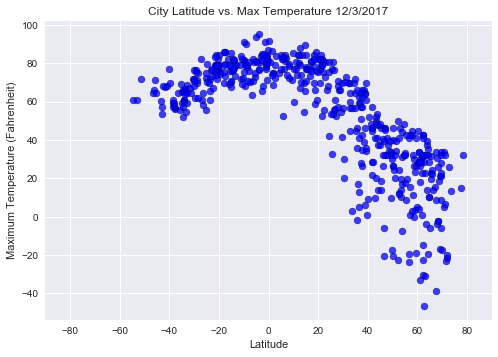

In [25]:
x_values = city_sample_df["Lat"]
y_values = city_sample_df["Max Temp (F)"]
plt.scatter(x_values,y_values,marker="o", 
            facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlim(-90, 90)
plt.ylabel("Maximum Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Max Temperature {now.month}/{now.day}/{now.year}')
plt.savefig("Temperature_v_Latitude.png")

plt.show()

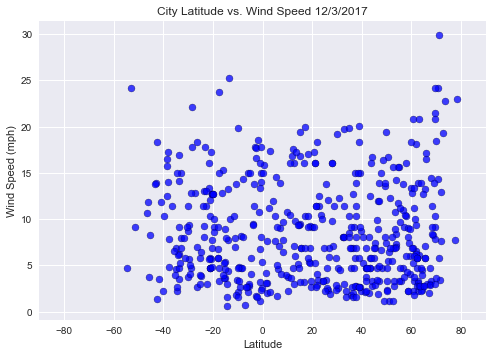

In [26]:
x_values = city_sample_df["Lat"]
y_values = city_sample_df["Wind Speed"]
plt.scatter(x_values,y_values,marker="o", 
            facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlim(-90, 90)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Wind Speed {now.month}/{now.day}/{now.year}')
plt.savefig("WindSpeed_v_Latitude.png")

plt.show()

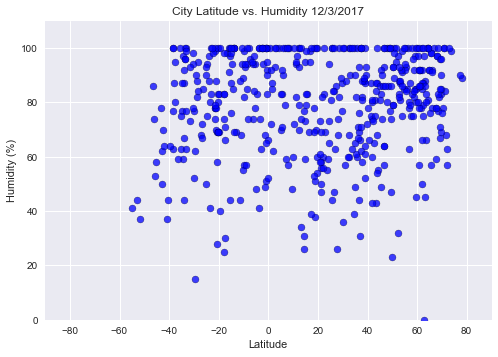

In [27]:
x_values = city_sample_df["Lat"]
y_values = city_sample_df["Humidity"]
plt.scatter(x_values,y_values,marker="o", 
            facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.ylim(0,110)
plt.xlim(-90, 90)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Humidity {now.month}/{now.day}/{now.year}')
plt.savefig("Humidity_v_Latitude.png")

plt.show()

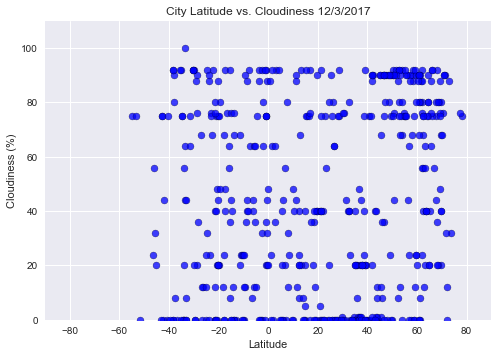

In [29]:
x_values = city_sample_df["Lat"]
y_values = city_sample_df["Cloudiness"]
plt.scatter(x_values,y_values,marker="o", 
            facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.ylim(0,110)
plt.xlim(-90, 90)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Cloudiness {now.month}/{now.day}/{now.year}')
plt.savefig("Cloudiness_v_Latitude.png")

plt.show()